<a href="https://colab.research.google.com/github/GeoKauko/TheNavySeals/blob/main/spectral_signatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#Connect to the google drive if you use Google Colaboratory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rasterio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 47.5 MB/s eta 0:00:00


In [ ]:
import zipfile
from glob import glob
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [ ]:
zip_path = "/content/drive/MyDrive/SealNN/data.zip"
data_path = "/content/drive/MyDrive/SealNN/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_path)

In [ ]:
image_dir = '/content/drive/MyDrive/SealNN/data/pansharpened/train/images'
mask_dir = '/content/drive/MyDrive/SealNN/data/pansharpened/train/masks'

image_files = sorted(glob(os.path.join(image_dir, '*.tif')))
mask_files = sorted(glob(os.path.join(mask_dir, '*.tif')))

In [ ]:
def extract_spectral_signatures(image_file, mask_file):
    with rasterio.open(image_file) as src:
        image = src.read()

    with rasterio.open(mask_file) as src:
        mask = src.read(1)

    # get seal and non seal pixels
    seal_pixels = image[:, mask == 1]
    nonseal_pixels = image[:, mask == 0]

    return seal_pixels, nonseal_pixels

## Plot the difference in spectral signatures in all training images

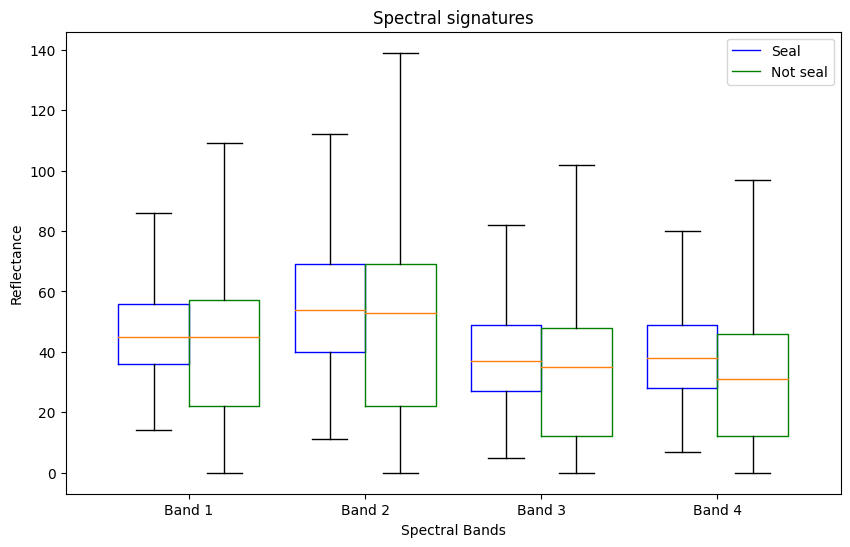

In [34]:
# lists to store signatures
seal_signatures = []
nonseal_signatures = []

# get signatures with a loop
for image_file, mask_file in zip(image_files, mask_files):
    seal_pixels, nonseal_pixels = extract_spectral_signatures(image_file, mask_file)
    seal_signatures.append(seal_pixels)
    nonseal_signatures.append(nonseal_pixels)

# convert to arrays
seal_signatures = np.concatenate(seal_signatures, axis=1)
nonseal_signatures = np.concatenate(nonseal_signatures, axis=1)

bands = range(1, seal_signatures.shape[0] + 1)
plt.figure(figsize=(10, 6))

# box plots for seal_signatures
plt.boxplot(seal_signatures.T, positions=np.array(bands) - 0.2, widths=0.4, showfliers=False,
            boxprops=dict(color='blue'))

# box plots for environment_signatures
plt.boxplot(nonseal_signatures.T, positions=np.array(bands) + 0.2, widths=0.4, showfliers=False,
            boxprops=dict(color='green'))

plt.xticks(bands, [f'Band {b}' for b in bands])
plt.xlabel('Spectral Bands')
plt.ylabel('Reflectance')
plt.title('Spectral signatures')
plt.legend(['Seal', 'Not seal'])

legend_handles = [
    Line2D([0], [0], color='blue', lw=1, label='Seal'),
    Line2D([0], [0], color='green', lw=1, label='Not seal')
]
plt.legend(handles=legend_handles)
plt.show()

## Plot the difference in spectral signatures in an image with confirmed seals

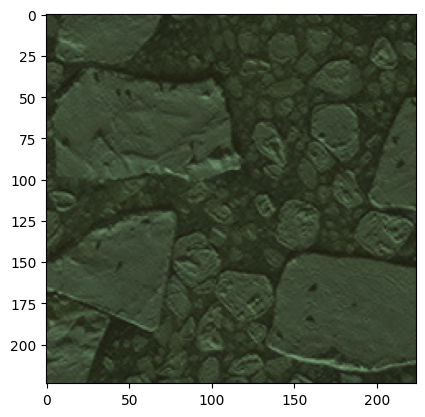

In [ ]:
image_file = image_files[600]
mask_file = mask_files[600]

# plot image
with rasterio.open(image_file) as src:
    image = src.read([1, 2, 3])

plt.imshow(np.transpose(image, (1, 2, 0)))
plt.show()


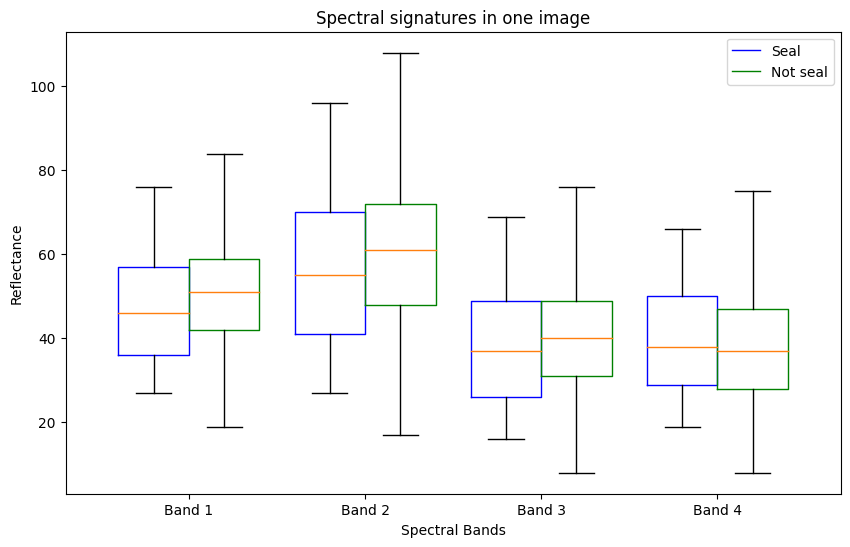

In [35]:
# get spectral signatures for single image
seal_pixels_img, nonseal_pixels_img = extract_spectral_signatures(image_file, mask_file)

# lists to arrays
seal_signatures_img = seal_pixels_img
nonseal_signatures_img = nonseal_pixels_img

# plot the spectral signatures
bands = range(1, seal_signatures_img.shape[0] + 1)
plt.figure(figsize=(10, 6))

# plot box plots for seal_signatures
plt.boxplot(seal_signatures_img.T, positions=np.array(bands) - 0.2, widths=0.4, showfliers=False,
            boxprops=dict(color='blue'))

# plot box plots for environment_signatures
plt.boxplot(nonseal_signatures_img.T, positions=np.array(bands) + 0.2, widths=0.4, showfliers=False,
            boxprops=dict(color='green'))

plt.xticks(bands, [f'Band {b}' for b in bands])
plt.xlabel('Spectral Bands')
plt.ylabel('Reflectance')
plt.title('Spectral signatures in one image')

legend_handles = [
    Line2D([0], [0], color='blue', lw=1, label='Seal'),
    Line2D([0], [0], color='green', lw=1, label='Not seal')
]

plt.legend(handles=legend_handles)
plt.show()